In [4]:
import numpy as np

import plotly.graph_objects as go
import plotly.io as pio

# Our 2-dimensional distribution will be over variables X and Y
N = 60
x = np.linspace(-3.5, 3.5, N)
y = np.linspace(-3.5, 3.5, N)
X, Y = np.meshgrid(x, y)


# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 2.5 , 1], [1,  2.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

fig = go.Figure(data=go.Surface(x=X, y=Y, z=Z))
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True),
                  showscale=False, opacity=0.6)
fig.update_layout(scene=dict(
                    xaxis=dict(visible=False),
                    yaxis=dict(visible=False),
                    zaxis=dict(visible=False, range=[0, 0.07]),
                    domain=dict(y=[0.1, 1])),
                  height=700,
                  margin=dict(r=0, l=0, b=0, t=0, pad=0))

f = go.FigureWidget(fig)
f

FigureWidget({
    'data': [{'contours': {'z': {'highlightcolor': 'limegreen',
                               …

In [5]:
pio.write_html(fig,
               file='../_includes/figures/figure.html',
               full_html=False,
               # include_mathjax='cdn',
               include_plotlyjs='cdn')

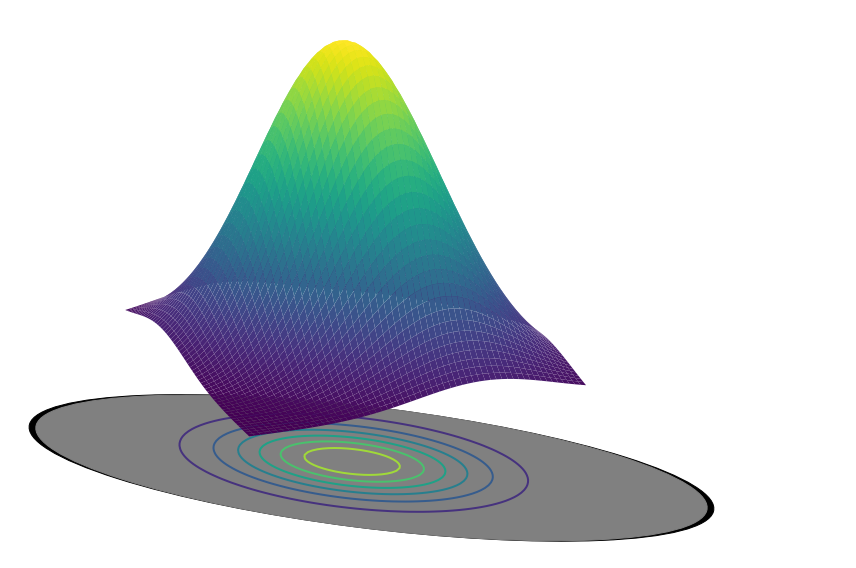

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# Our 2-dimensional distribution will be over variables X and Y
N = 60
x = np.linspace(-3.5, 3.5, N)
y = np.linspace(-3.5, 3.5, N)
X, Y = np.meshgrid(x, y)


# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 2.5 , 1], [1,  2.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True,
                cmap=cm.viridis)
ax.contour(X, Y, Z, zdir='z', offset=-0.025, cmap=cm.viridis, linewidths=2)

boat = mpl.patches.Ellipse((-0.015, -0.064), 0.15, 0.04, angle=169, color='gray')
frame = mpl.patches.Ellipse((-0.015, -0.064), 0.153, 0.04, angle=169, color='black')
ax.add_artist(frame)
ax.add_artist(boat)

plt.gca().set_axis_off()

# Adjust the limits, ticks and view angle
ax.set_xlim(-3, 5)
ax.set_ylim(-3, 6)
ax.set_zlim(-0.01, 0.05)
ax.view_init(27, -21)

plt.tight_layout()
plt.savefig('../images/probability.png', transparent=True, bbox_inches='tight', pad_inches=0)